In [ ]:
# --------------------------------------------
# 0️⃣ Setup: Install dependencies
# --------------------------------------------
!pip install retina-face opencv-python


In [ ]:
import cv2
import os
from retinaface import RetinaFace
import shutil
from google.colab import files

# --------------------------------------------
# 1️⃣ Upload video from local to Colab
# --------------------------------------------
uploaded = files.upload()  # Allow user to upload the video
video_path = list(uploaded.keys())[0]  # Use the first uploaded file

# Create a directory to save cropped faces
output_dir = 'cropped_faces'
os.makedirs(output_dir, exist_ok=True)

# --------------------------------------------
# 2️⃣ Read the video
# --------------------------------------------
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise FileNotFoundError(f"Video file {video_path} not found.")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration_seconds = frame_count / fps

def get_frame_at_timestamp(timestamp_sec):
    cap.set(cv2.CAP_PROP_POS_MSEC, timestamp_sec * 1000)
    ret, frame = cap.read()
    return frame if ret else None

# --------------------------------------------
# 3️⃣ Process 10s clips every 5 minutes
# --------------------------------------------
clip_duration = 10
interval = 5 * 60

for start_time in range(0, int(duration_seconds), interval):
    end_time = start_time + clip_duration
    print(f"\n🎞️ Processing clip: {start_time}s to {end_time}s")

    for timestamp in range(start_time, end_time):
        frame = get_frame_at_timestamp(timestamp)
        if frame is None:
            print(f"⚠️ No frame at {timestamp}s.")
            continue

        # 4️⃣ Face Detection
        try:
            faces = RetinaFace.detect_faces(frame)
        except Exception as e:
            print(f"❌ Face detection failed at {timestamp}s: {e}")
            continue

        if not faces:
            print(f"😐 No faces detected at {timestamp}s.")
            continue

        clip_dir = os.path.join(output_dir, f"clip_{start_time}-{end_time}s")
        os.makedirs(clip_dir, exist_ok=True)

        for i, (key, face) in enumerate(faces.items()):
            x1, y1, x2, y2 = face["facial_area"]
            face_img = frame[y1:y2, x1:x2]
            face_filename = os.path.join(clip_dir, f"face_{timestamp}_{i+1}.jpg")
            cv2.imwrite(face_filename, face_img)
            print(f"✅ Saved: {face_filename}")

# --------------------------------------------
# 5️⃣ Compress and Download Results
# --------------------------------------------
zip_path = shutil.make_archive(output_dir, 'zip', output_dir)
print(f"\n📦 Cropped faces saved to ZIP: {zip_path}")

# Download to local machine
files.download(zip_path)


Saving K201_13min.mp4 to K201_13min.mp4

🎞️ Processing clip: 0s to 10s
25-09-19 05:52:56 - Directory /root/.deepface created
25-09-19 05:52:56 - Directory /root/.deepface/weights created
25-09-19 05:52:56 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 316MB/s]


✅ Saved: cropped_faces/clip_0-10s/face_0_1.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_2.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_3.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_4.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_5.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_6.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_7.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_8.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_9.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_10.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_11.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_12.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_13.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_14.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_15.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_16.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_17.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_18.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_19.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_20.jpg
✅ Saved: cropped_faces/clip_0-10s/face_0_21.jpg
✅

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

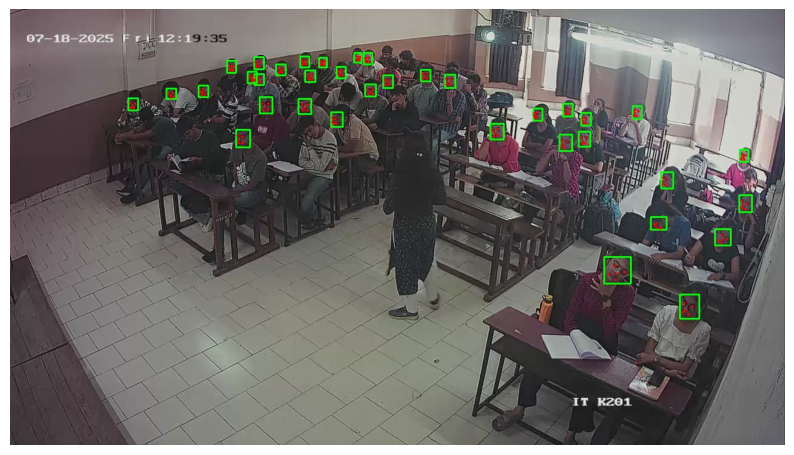

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read the saved image
img = cv2.imread("test_faces_annotated.jpg")

# Convert BGR (OpenCV default) to RGB for proper colors
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display inline in Colab
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
checkpoint = torch.load("/content/scrfd_34g.pth", map_location="cpu")
print(checkpoint['meta'])


NameError: name 'torch' is not defined